In [32]:
#In this file Big Query zipcode tables data is cleaned and imputed appropriately
#A big task performed here is the build the acs features in line with the ZRI data
#which is provided monthly.  The ACS features are duplicated for the months and the data
#is pushed back by time t in years i.e. 3 would mean that ACS features from 3 years ago
#would be used (this code needs some more refactoring)
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
from matplotlib import pyplot as plt
%matplotlib inline
from google.cloud import bigquery
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="./utility-vista-307720-6cec755818c9.json"
client = bigquery.Client()
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [127]:
zri_all_clean=pd.read_csv("Phoenix_All_ZRI.csv")

In [99]:
zri_all_clean.isnull().any()

Unnamed: 0    False
RegionID      False
zipcode       False
City          False
State         False
Metro         False
CountyName    False
SizeRank      False
Period        False
ZRI           False
ZRI_norm      False
Year          False
Month         False
dtype: bool

In [128]:
zri_all_clean_2014_2020=zri_all_clean[(zri_all_clean["Year"]>=2014) & (zri_all_clean["Year"]<=2020)]

In [36]:
#features should go back 3 years
t=3

In [37]:
%%bigquery acs_zip_codes_2011_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2011_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');

Downloading: 100%|██████████| 130/130 [00:02<00:00, 59.36rows/s]


In [38]:
%%bigquery acs_zip_codes_2012_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2012_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');

Downloading: 100%|██████████| 130/130 [00:02<00:00, 62.66rows/s]


In [39]:
%%bigquery acs_zip_codes_2013_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2013_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');

Downloading: 100%|██████████| 130/130 [00:02<00:00, 62.14rows/s]


In [40]:
%%bigquery acs_zip_codes_2014_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2014_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');

Downloading: 100%|██████████| 130/130 [00:01<00:00, 69.56rows/s]


In [41]:
%%bigquery acs_zip_codes_2015_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2015_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');

Downloading: 100%|██████████| 130/130 [00:02<00:00, 61.70rows/s]


In [42]:
%%bigquery acs_zip_codes_2016_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2016_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');

Downloading: 100%|██████████| 130/130 [00:01<00:00, 68.81rows/s]


In [43]:
%%bigquery acs_zip_codes_2017_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2017_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');

Downloading: 100%|██████████| 130/130 [00:01<00:00, 65.25rows/s]


In [44]:
%%bigquery acs_zip_codes_2018_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2018_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');

Downloading: 100%|██████████| 130/130 [00:02<00:00, 62.48rows/s]


In [150]:
acs_zip_codes_2011_5yr["Year"]=2011
acs_zip_codes_2012_5yr["Year"]=2012
acs_zip_codes_2013_5yr["Year"]=2013
acs_zip_codes_2014_5yr["Year"]=2014
acs_zip_codes_2015_5yr["Year"]=2015
acs_zip_codes_2016_5yr["Year"]=2016
acs_zip_codes_2017_5yr["Year"]=2017
acs_zip_codes_2018_5yr["Year"]=2018

In [151]:
acs_cols_2011=acs_zip_codes_2011_5yr.columns
acs_cols_2012=acs_zip_codes_2012_5yr.columns
acs_cols_2013=acs_zip_codes_2013_5yr.columns
acs_cols_2014=acs_zip_codes_2014_5yr.columns
acs_cols_2015=acs_zip_codes_2015_5yr.columns
acs_cols_2016=acs_zip_codes_2016_5yr.columns
acs_cols_2017=acs_zip_codes_2017_5yr.columns
acs_cols_2018=acs_zip_codes_2018_5yr.columns

In [152]:
common_columns=list(((((((set(acs_cols_2011).intersection
   (set(acs_cols_2012))).intersection
  (set(acs_cols_2013))).intersection
 (set(acs_cols_2014))).intersection
(set(acs_cols_2015))).intersection(set(acs_cols_2016)))
                    .intersection(set(acs_cols_2017))).intersection(set(acs_cols_2018)))

In [48]:
len(common_columns)

235

In [161]:
frames=[acs_zip_codes_2011_5yr[common_columns],
        acs_zip_codes_2012_5yr[common_columns],
        acs_zip_codes_2013_5yr[common_columns],
        acs_zip_codes_2014_5yr[common_columns],
        acs_zip_codes_2015_5yr[common_columns],
        acs_zip_codes_2016_5yr[common_columns],
        acs_zip_codes_2017_5yr[common_columns],
        acs_zip_codes_2018_5yr[common_columns]]
acs_all_phoenix=pd.concat(frames)

In [162]:
acs_all_phoenix.head()
acs_all_phoenix.shape

(1040, 235)

In [163]:
missingRowsACS = pd.isnull(acs_all_phoenix).sum(axis=1) > 0
missingColsACS = pd.isnull(acs_all_phoenix).sum(axis=0) > 0
missingColsACS.sum()

16

In [172]:
#Drop columns that have missing data for 2 or more zipcodes
for col in acs_all_phoenix.columns[missingColsACS]:
    if pd.isnull(acs_all_phoenix[col]).sum()>=0: 
        print(f"Dropping {col} from ACS")
        acs_all_phoenix.drop(col,axis=1,inplace=True)

Dropping bachelors_degree from ACS
Dropping speak_only_english_at_home from ACS
Dropping median_year_structure_built from ACS
Dropping aggregate_travel_time_to_work from ACS
Dropping speak_spanish_at_home_low_english from ACS
Dropping renter_occupied_housing_units_paying_cash_median_gross_rent from ACS
Dropping less_one_year_college from ACS
Dropping masters_degree from ACS
Dropping one_year_more_college from ACS
Dropping high_school_diploma from ACS
Dropping median_rent from ACS
Dropping percent_income_spent_on_rent from ACS
Dropping associates_degree from ACS
Dropping pop_5_years_over from ACS
Dropping speak_spanish_at_home from ACS
Dropping pop_25_years_over from ACS


In [173]:
acs_all_phoenix.shape

(1040, 219)

In [166]:
#use this data to replace values missing in 2011
replacement_rows = acs_all_phoenix[acs_all_phoenix["Year"]==2012]

In [167]:
def impute_masters_degree(row):
    return replacement_rows[replacement_rows["geo_id"]==row["geo_id"]]["masters_degree"].values[0]
def impute_pop_25_years_over(row):
    return replacement_rows[replacement_rows["geo_id"]==row["geo_id"]]["pop_25_years_over"].values[0]
def impute_associates_degree(row):
    return replacement_rows[replacement_rows["geo_id"]==row["geo_id"]]["associates_degree"].values[0]
def impute_less_one_year_college(row):
    return replacement_rows[replacement_rows["geo_id"]==row["geo_id"]]["less_one_year_college"].values[0]
def impute_high_school_diploma(row):
    return replacement_rows[replacement_rows["geo_id"]==row["geo_id"]]["high_school_diploma"].values[0]
def impute_one_year_more_college(row):
    return replacement_rows[replacement_rows["geo_id"]==row["geo_id"]]["one_year_more_college"].values[0]
def impute_bachelors_degree(row):
    return replacement_rows[replacement_rows["geo_id"]==row["geo_id"]]["bachelors_degree"].values[0]

In [168]:
missingrows = acs_all_phoenix['masters_degree'].isnull()
acs_all_phoenix.loc[missingrows,'masters_degree']=acs_all_phoenix[missingrows].apply(impute_masters_degree, axis=1)
acs_all_phoenix.loc[missingrows,'pop_25_years_over']=acs_all_phoenix[missingrows].apply(impute_pop_25_years_over, axis=1)
acs_all_phoenix.loc[missingrows,'associates_degree']=acs_all_phoenix[missingrows].apply(impute_associates_degree, axis=1)
acs_all_phoenix.loc[missingrows,'less_one_year_college']=acs_all_phoenix[missingrows].apply(impute_less_one_year_college, axis=1)
acs_all_phoenix.loc[missingrows,'high_school_diploma']=acs_all_phoenix[missingrows].apply(impute_high_school_diploma, axis=1)
acs_all_phoenix.loc[missingrows,'one_year_more_college']=acs_all_phoenix[missingrows].apply(impute_one_year_more_college, axis=1)
acs_all_phoenix.loc[missingrows,'bachelors_degree']=acs_all_phoenix[missingrows].apply(impute_bachelors_degree, axis=1)

In [174]:
acs_all_phoenix.to_csv("ACS_Phoenix_All_Imputed.csv")

In [175]:
zri_all_clean_2014_2020.shape

(9563, 13)

In [176]:
zri_all_clean_2014_2020=zri_all_clean_2014_2020.sort_values(["zipcode","Year","Month"])

In [177]:
zri_all_clean_2014_2020_count=zri_all_clean_2014_2020.groupby(["Year","zipcode","Month"])["Year"].agg('count')

In [178]:
zri_all_clean_2014_2020.shape

(9563, 13)

In [110]:
zri_all_clean_2014_2020.dtypes

Unnamed: 0      int64
RegionID        int64
zipcode         int64
City           object
State          object
Metro          object
CountyName     object
SizeRank        int64
Period         object
ZRI           float64
ZRI_norm      float64
Year            int64
Month           int64
dtype: object

In [179]:
zri_all_clean_2014_2020=zri_all_clean_2014_2020[zri_all_clean_2014_2020["zipcode"]!=85378]

In [180]:
zri_all_clean_2014_2020

Unnamed: 0  RegionID  zipcode             City State  \
5221         5221     94719    85003          Phoenix    AZ   
5352         5352     94719    85003          Phoenix    AZ   
5483         5483     94719    85003          Phoenix    AZ   
5614         5614     94719    85003          Phoenix    AZ   
5745         5745     94719    85003          Phoenix    AZ   
5876         5876     94719    85003          Phoenix    AZ   
6007         6007     94719    85003          Phoenix    AZ   
6138         6138     94719    85003          Phoenix    AZ   
6269         6269     94719    85003          Phoenix    AZ   
6400         6400     94719    85003          Phoenix    AZ   
6531         6531     94719    85003          Phoenix    AZ   
6662         6662     94719    85003          Phoenix    AZ   
6793         6793     94719    85003          Phoenix    AZ   
6924         6924     94719    85003          Phoenix    AZ   
7055         7055     94719    85003          Phoenix    AZ   
7186         7186     94719    85003          Phoenix    AZ   
7317         7317     94719    85003          Phoenix    AZ   
7448         7448     94719    85003          Phoenix    AZ   
7579         7579     94719    85003          Phoenix    AZ   
7710         7710     94719    85003          Phoenix    AZ   
7841         7841     94719    85003          Phoenix    AZ   
7972         7972     94719    85003          Phoenix    AZ   
8103         8103     94719    85003          Phoenix    AZ   
8234         8234     94719    85003          Phoenix    AZ   
8365         8365     94719    85003          Phoenix    AZ   
8496         8496     94719    85003          Phoenix    AZ   
8627         8627     94719    85003          Phoenix    AZ   
8758         8758     94719    85003          Phoenix    AZ   
8889         8889     94719    85003          Phoenix    AZ   
9020         9020     94719    85003          Phoenix    AZ   
9151         9151     94719    85003          Phoenix    AZ   
9282         9282     94719    85003          Phoenix    AZ   
9413         9413     94719    85003          Phoenix    AZ   
9544         9544     94719    85003          Phoenix    AZ   
9675         9675     94719    85003          Phoenix    AZ   
9806         9806     94719    85003          Phoenix    AZ   
9937         9937     94719    85003          Phoenix    AZ   
10068       10068     94719    85003          Phoenix    AZ   
10199       10199     94719    85003          Phoenix    AZ   
10330       10330     94719    85003          Phoenix    AZ   
10461       10461     94719    85003          Phoenix    AZ   
10592       10592     94719    85003          Phoenix    AZ   
10723       10723     94719    85003          Phoenix    AZ   
10854       10854     94719    85003          Phoenix    AZ   
10985       10985     94719    85003          Phoenix    AZ   
11116       11116     94719    85003          Phoenix    AZ   
11247       11247     94719    85003          Phoenix    AZ   
11378       11378     94719    85003          Phoenix    AZ   
11509       11509     94719    85003          Phoenix    AZ   
11640       11640     94719    85003          Phoenix    AZ   
11771       11771     94719    85003          Phoenix    AZ   
11902       11902     94719    85003          Phoenix    AZ   
12033       12033     94719    85003          Phoenix    AZ   
12164       12164     94719    85003          Phoenix    AZ   
12295       12295     94719    85003          Phoenix    AZ   
12426       12426     94719    85003          Phoenix    AZ   
12557       12557     94719    85003          Phoenix    AZ   
12688       12688     94719    85003          Phoenix    AZ   
12819       12819     94719    85003          Phoenix    AZ   
12950       12950     94719    85003          Phoenix    AZ   
13081       13081     94719    85003          Phoenix    AZ   
13212       13212     94719    85003          Phoenix    AZ   
13343       13343     94719    85003  

In [109]:
acs_all_phoenix[acs_all_phoenix["geo_id"]=="85383"]

male_45_64_graduate_degree income_35000_39999 asian_male_55_64  \
62                         693                146              137   
95                         745                133              114   
45                         840                191               67   
117                        976                288              108   
59               990.000000000      290.000000000    114.000000000   
17                        1068                310              109   
120                       1110                399              125   
62                        1216                307              112   

    rent_35_to_40_percent owner_occupied_housing_units  \
62                    149                         9747   
95                    171                         9846   
45                    159                         9998   
117                   147                        10630   
59           87.000000000              11265.000000000   
17                    118                        11443   
120                   130                        13048   
62                    114                        14187   

    dwellings_1_units_attached  \
62                          51   
95                         122   
45                         131   
117                        155   
59               192.000000000   
17                         153   
120                        139   
62                         148   

    two_parents_in_labor_force_families_with_young_children  \
62                                                1651        
95                                                1539        
45                                                1574        
117                                               1863        
59                                      2092.000000000        
17                                                1884        
120                                               2217        
62                                                2486        

    rent_under_10_percent male_45_64_grade_9_12 rent_10_to_15_percent  \
62                     33                    93                   120   
95                     27                   132                   134   
45                     15                   152                   232   
117                    28                   127                   224   
59           42.000000000         152.000000000         216.000000000   
17                     47                   100                   269   
120                    47                   116                   255   
62                     43                   144                   193   

    hispanic_male_55_64 two_parent_families_with_young_children  \
62                   24                                    3044   
95                   20                                    2788   
45                   30                                    2832   
117                  41                                    3102   
59         83.000000000                          3268.000000000   
17                  104                                    3083   
120                 130                                    3428   
62                  123                                    3653   

    commuters_16_over  \
62              15741   
95              16246   
45              16194   
117             17115   
59    17456.000000000   
17              17550   
120             19388   
62              20834   

    two_parents_not_in_labor_force_families_with_young_children  \
62                                                  32            
95                                                  24            
45                                                  25            
117                                                 27            
59                                                0E-9            
17                                                   0            
120               

In [105]:
#create rows by year and month to match ZRI index incidences
acs_new=pd.DataFrame()
for idx in zri_all_clean_2014_2020_count.index:
    year,zipcode,month=idx
    count=zri_all_clean_2014_2020_count[idx]
    df=pd.DataFrame(acs_all_phoenix[(acs_all_phoenix["geo_id"]==str(zipcode)) & (acs_all_phoenix["Year"].astype(int)==(int(year)-t))]) 
    if df.shape[0]==0:
        print(zipcode,year)
    acs_new=pd.concat([acs_new,df])

85378 2014
85378 2014
85378 2014
85378 2014
85378 2014
85378 2014
85378 2014
85378 2014
85378 2014
85378 2014
85378 2014
85378 2014
85378 2015
85378 2015
85378 2015
85378 2015
85378 2015
85378 2015
85378 2015
85378 2015
85378 2015
85378 2015
85378 2015
85378 2015
85378 2016
85378 2016
85378 2016
85378 2016
85378 2016
85378 2016
85378 2016
85378 2016
85378 2016
85378 2016
85378 2016
85378 2016
85378 2017
85378 2017
85378 2017
85378 2017
85378 2017
85378 2017
85378 2017
85378 2017
85378 2017
85378 2017
85378 2017
85378 2017
85378 2018
85378 2018
85378 2018
85378 2018
85378 2018
85378 2018
85378 2018
85378 2018
85378 2018
85378 2018
85378 2018
85378 2018
85378 2019
85378 2019
85378 2019
85378 2019
85378 2019
85378 2019
85378 2019
85378 2019
85378 2019
85378 2019
85378 2019
85378 2019
85378 2020


In [88]:
acs_all_phoenix.head()

male_45_64_graduate_degree income_35000_39999 asian_male_55_64  \
0                         53                115                0   
1                        606                267                0   
2                        269                855               51   
3                         94                260                0   
4                        225                896               18   

  rent_35_to_40_percent owner_occupied_housing_units  \
0                    48                         1821   
1                   433                         9093   
2                   428                         8659   
3                   154                         2954   
4                   204                        11876   

  dwellings_1_units_attached  \
0                          0   
1                        420   
2                       1037   
3                        165   
4                       1520   

  two_parents_in_labor_force_families_with_young_children  \
0                                                235        
1                                               1569        
2                                                578        
3                                                 20        
4                                                922        

  rent_under_10_percent male_45_64_grade_9_12 rent_10_to_15_percent  \
0                    33                    56                     0   
1                    37                   138                   555   
2                   124                   375                   269   
3                    82                    40                    16   
4                   172                   187                   157   

  hispanic_male_55_64 two_parent_families_with_young_children  \
0                  19                                     373   
1                  88                                    3117   
2                 321                                    1115   
3                   0                                     245   
4                 165                                    1721   

  commuters_16_over  \
0              2816   
1             18583   
2             16545   
3              2491   
4             14509   

  two_parents_not_in_labor_force_families_with_young_children  \
0                                                  0            
1                                                  0            
2                                                 30            
3                                                  0            
4                                                 88            

  male_45_64_bachelors_degree female_10_to_14  \
0                         235             115   
1                        1028            1605   
2                         622            1118   
3                         174             210   
4                         947            1158   

  management_business_sci_arts_employed male_45_64_associates_degree  \
0                                  1104                           25   
1                                  7785                          661   
2                                  5160                          526   
3                                  1033                           95   
4                                  5328                          336   

  vacant_housing_units_for_rent in_grades_1_to_4 children  \
0                            26              316     1431   
1                            31             2801    11931   
2                           825             2029     8882   
3                           147              303     1335   
4                           408             2303     9310   

  commuters_by_carpool  \
0                  155   
1                 2256   
2                 1861   
3                  276   
4                 1938   

  father_in_labor_force_one_parent_families_with_young_children  \
0                            

In [106]:
acs_new.shape

(9490, 226)

In [120]:
#acs_new.to_csv("ACS_Phoenix_Imputed_Final.csv")

In [122]:
y=zri_all_clean_2014_2020["ZRI"]

In [125]:
all_acs_features=[]
for i in acs_new.columns:
    all_acs_features.append(i)
features_selected=acs_new.columns

In [45]:
X=acs_new[['total_pop', 'median_age', 'white_pop', 'black_pop',
       'asian_pop', 'hispanic_pop', 'gini_index', 'income_per_capita',
        'housing_units_renter_occupied',
       'percent_income_spent_on_rent', 'high_school_diploma',
       'associates_degree', 'bachelors_degree', 'masters_degree']]

In [46]:
def plot_XY_scatter(x_plot_cols):
    x_plot=acs_new[x_plot_cols].astype(float)
    for col in x_plot:
        x_plot[col]=(x_plot[col]-x_plot[col].mean())/x_plot[col].std()
    print("Missing values:",x_plot.isnull().any().sum())
    newY=zri_mf_clean.groupby(["Year","zipcode"])["ZRI"].agg("mean")
    plt.figure(figsize=(40,40))  # change the size of figure!
    i=0
    for col in x_plot_cols:
        tempX=x_plot.groupby(["Year","geo_id"])[col].agg("mean")
        plt.subplot(10,6, i+1)   
        m, b = np.polyfit(tempX, newY, 1)
        if (np.abs(m)>slope_threshold):
            features_selected.append(col)
        plt.plot(tempX, m*tempX + b, color="red")
        plt.scatter(tempX,newY)
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
        plt.title(col)  
        i+=1

Missing values: 0


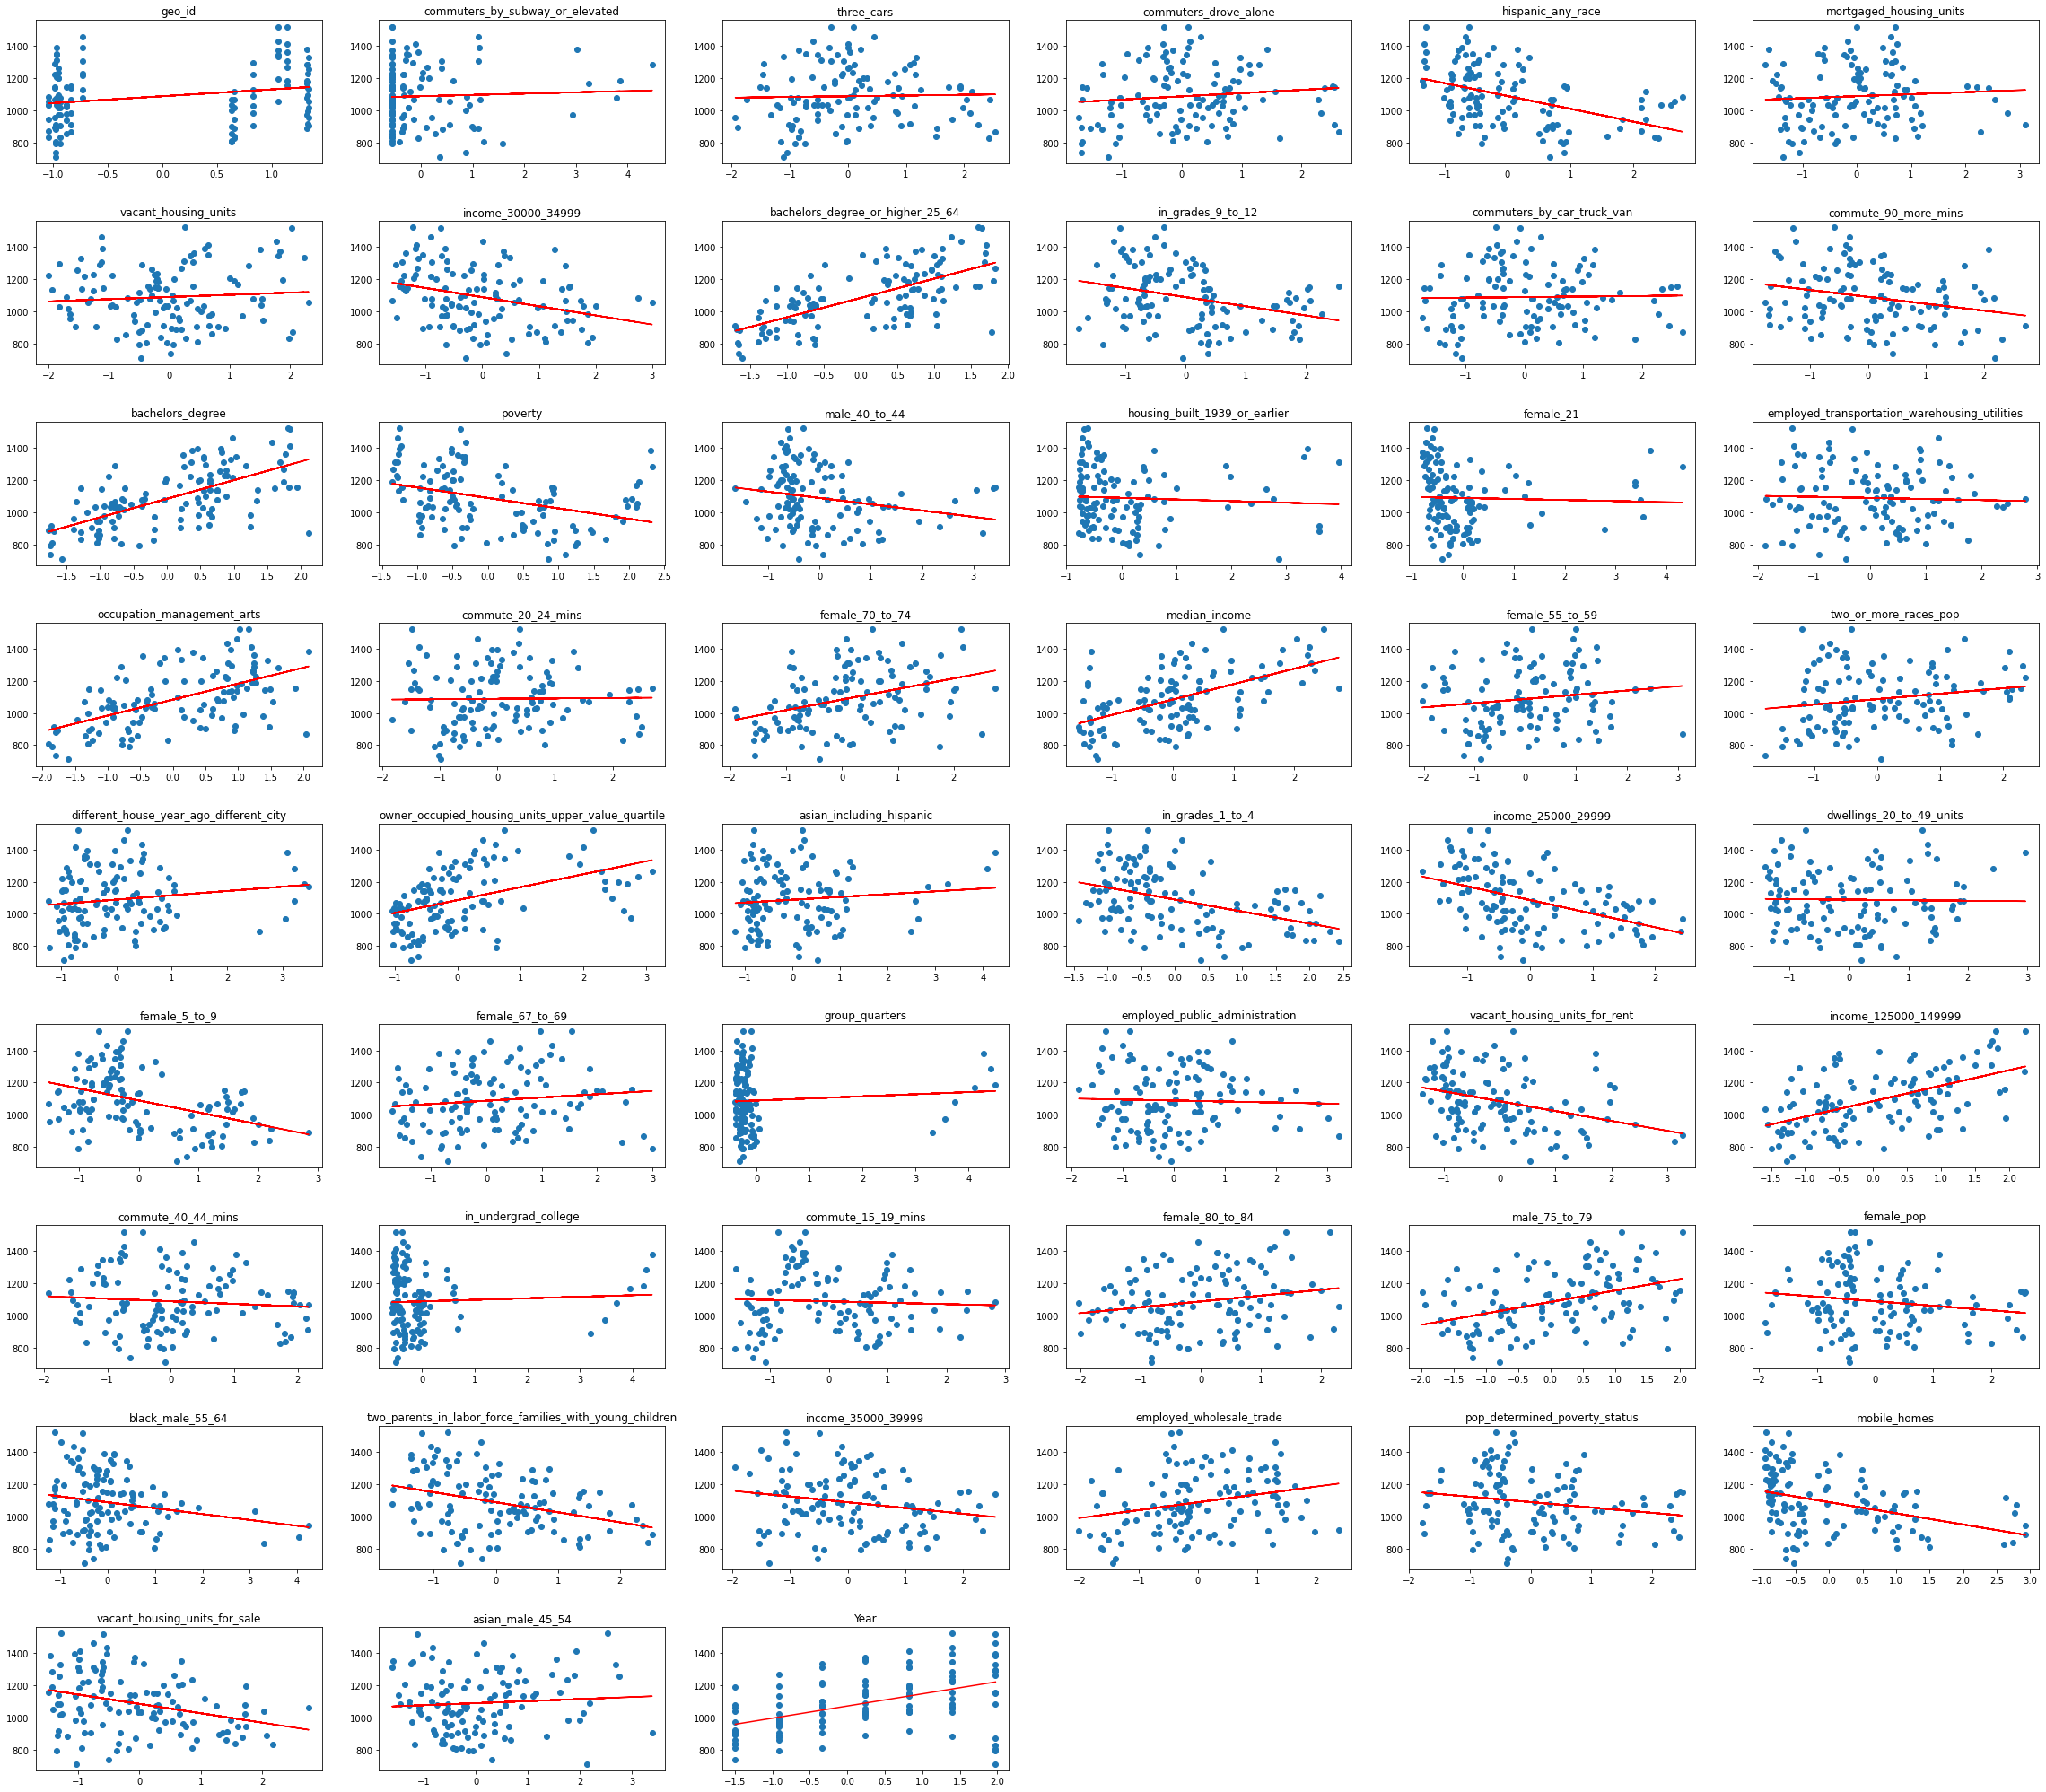

In [47]:
features_selected=[]
slope_threshold=40
first50_features=list(set(all_acs_features[0:49]+["Year","geo_id"]))
plot_XY_scatter(first50_features)

Missing values: 0


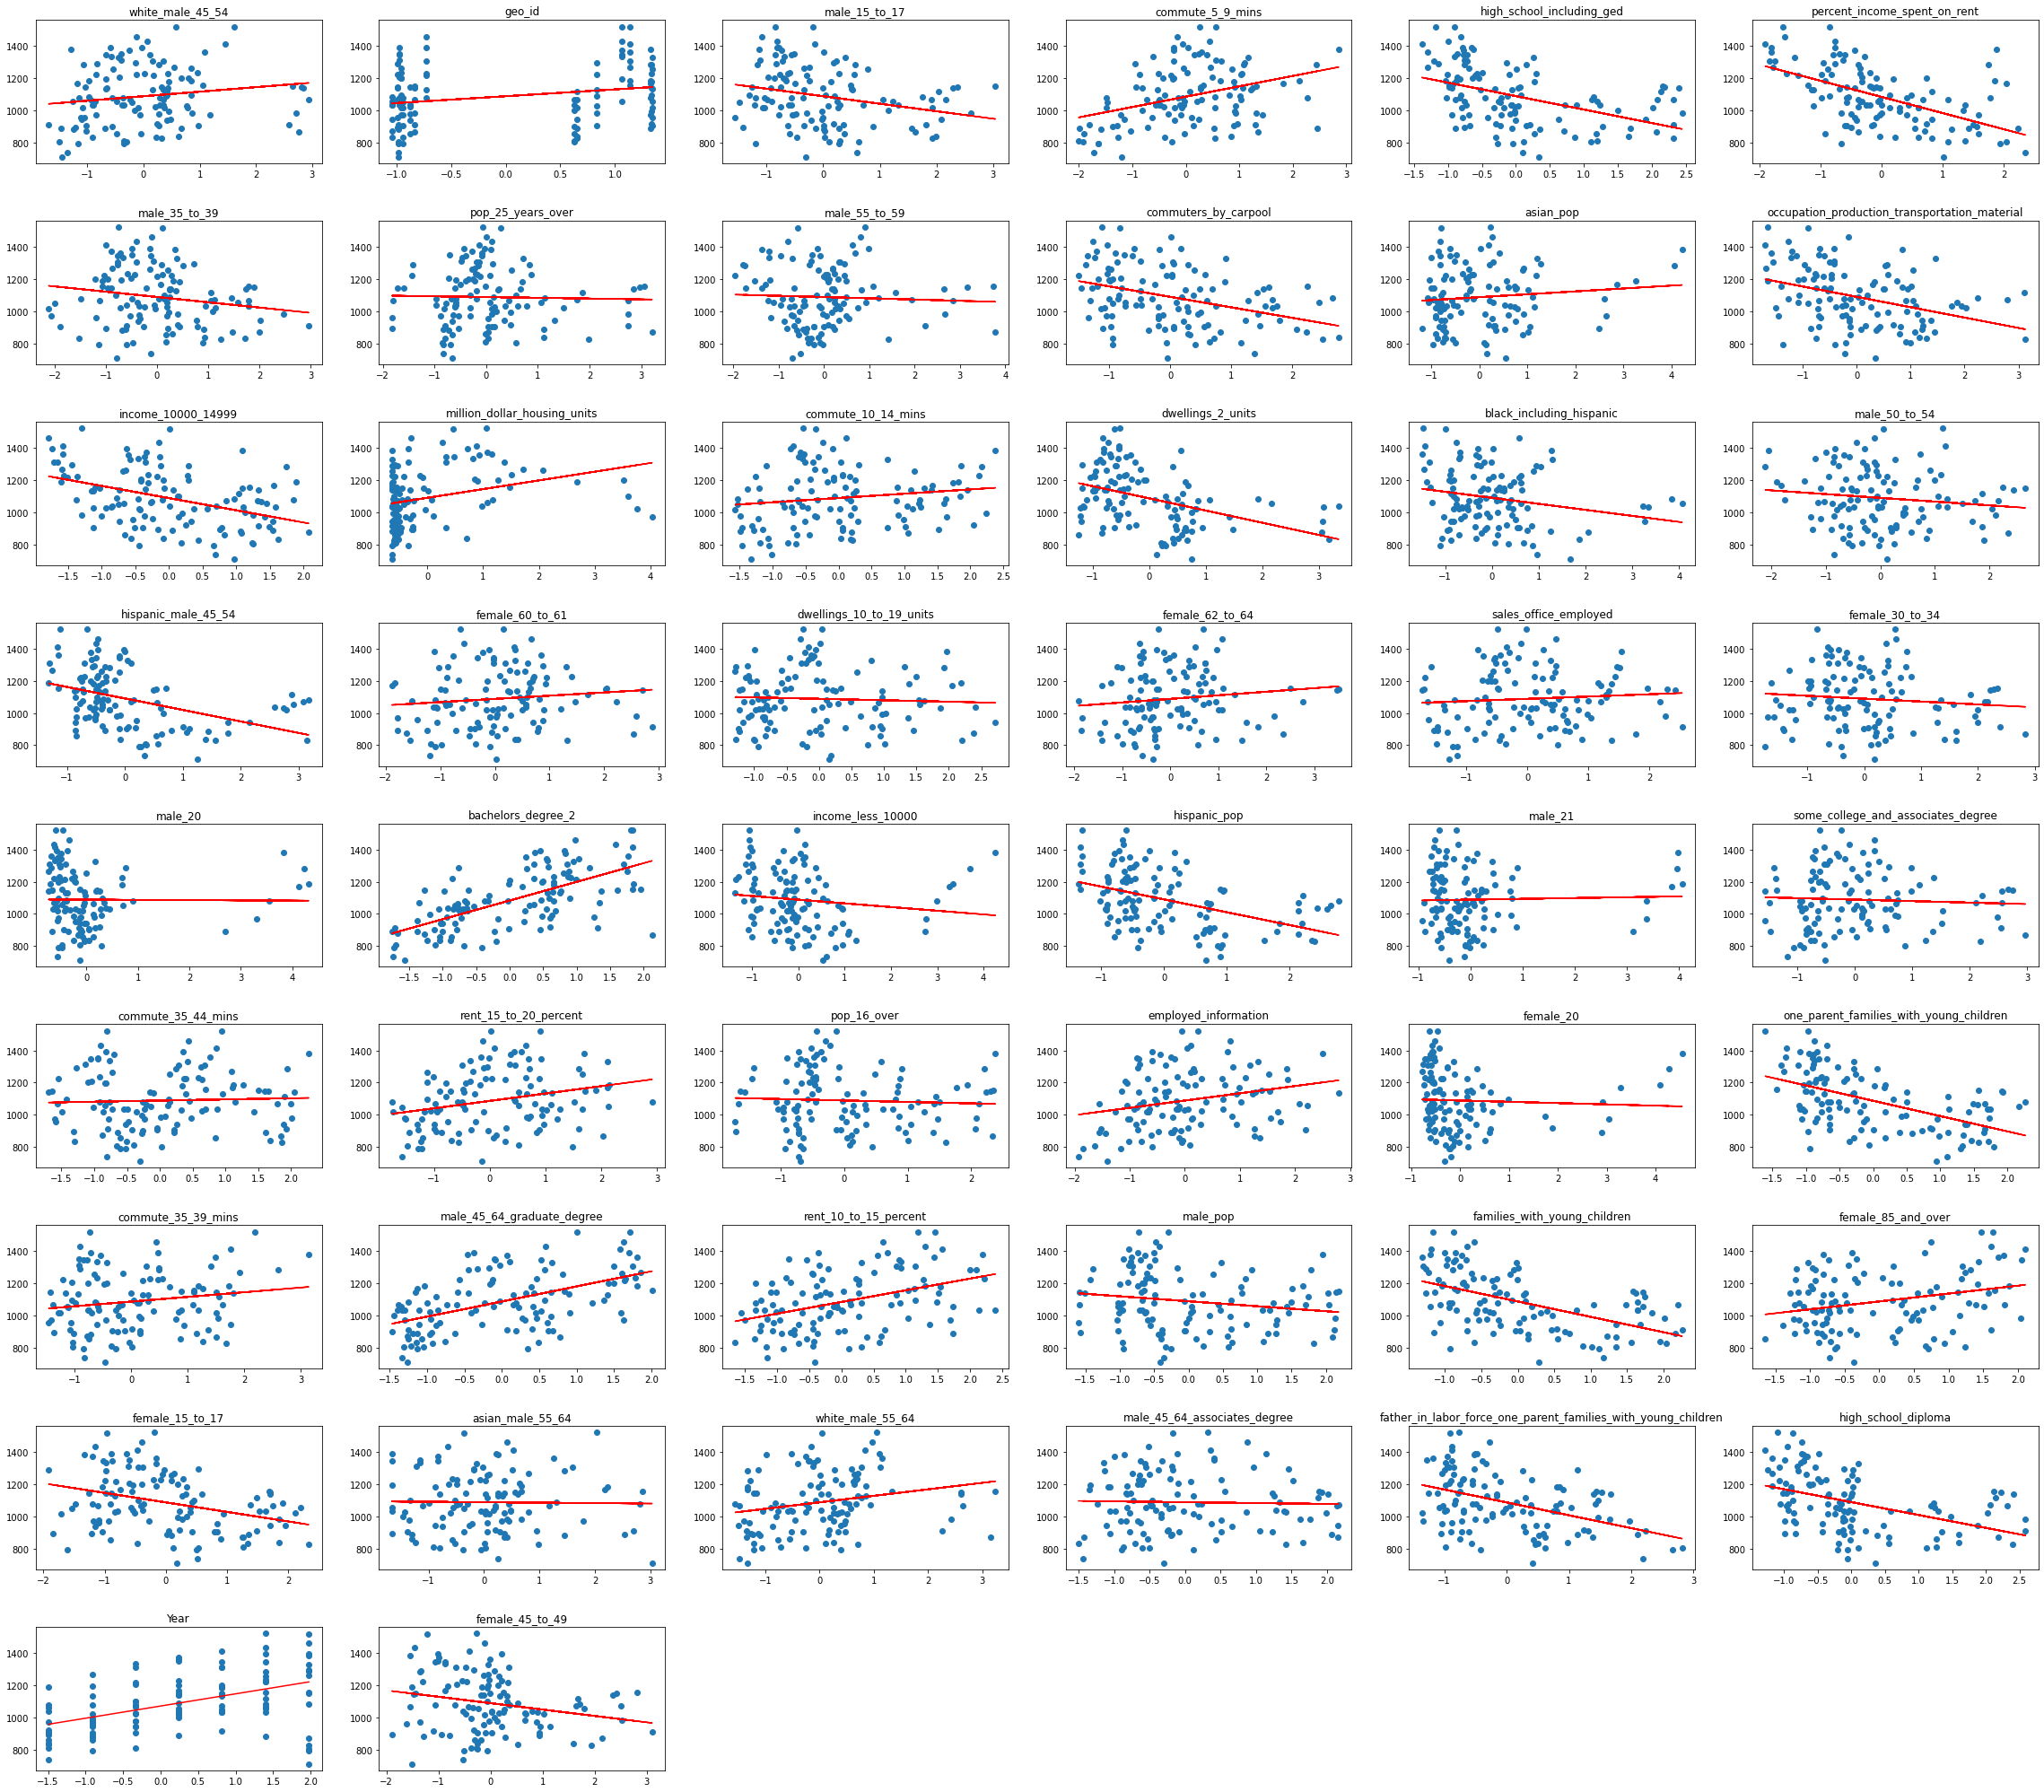

In [48]:
second50_features=list(set(all_acs_features[50:99]+["Year","geo_id"]))
plot_XY_scatter(second50_features)

Missing values: 0


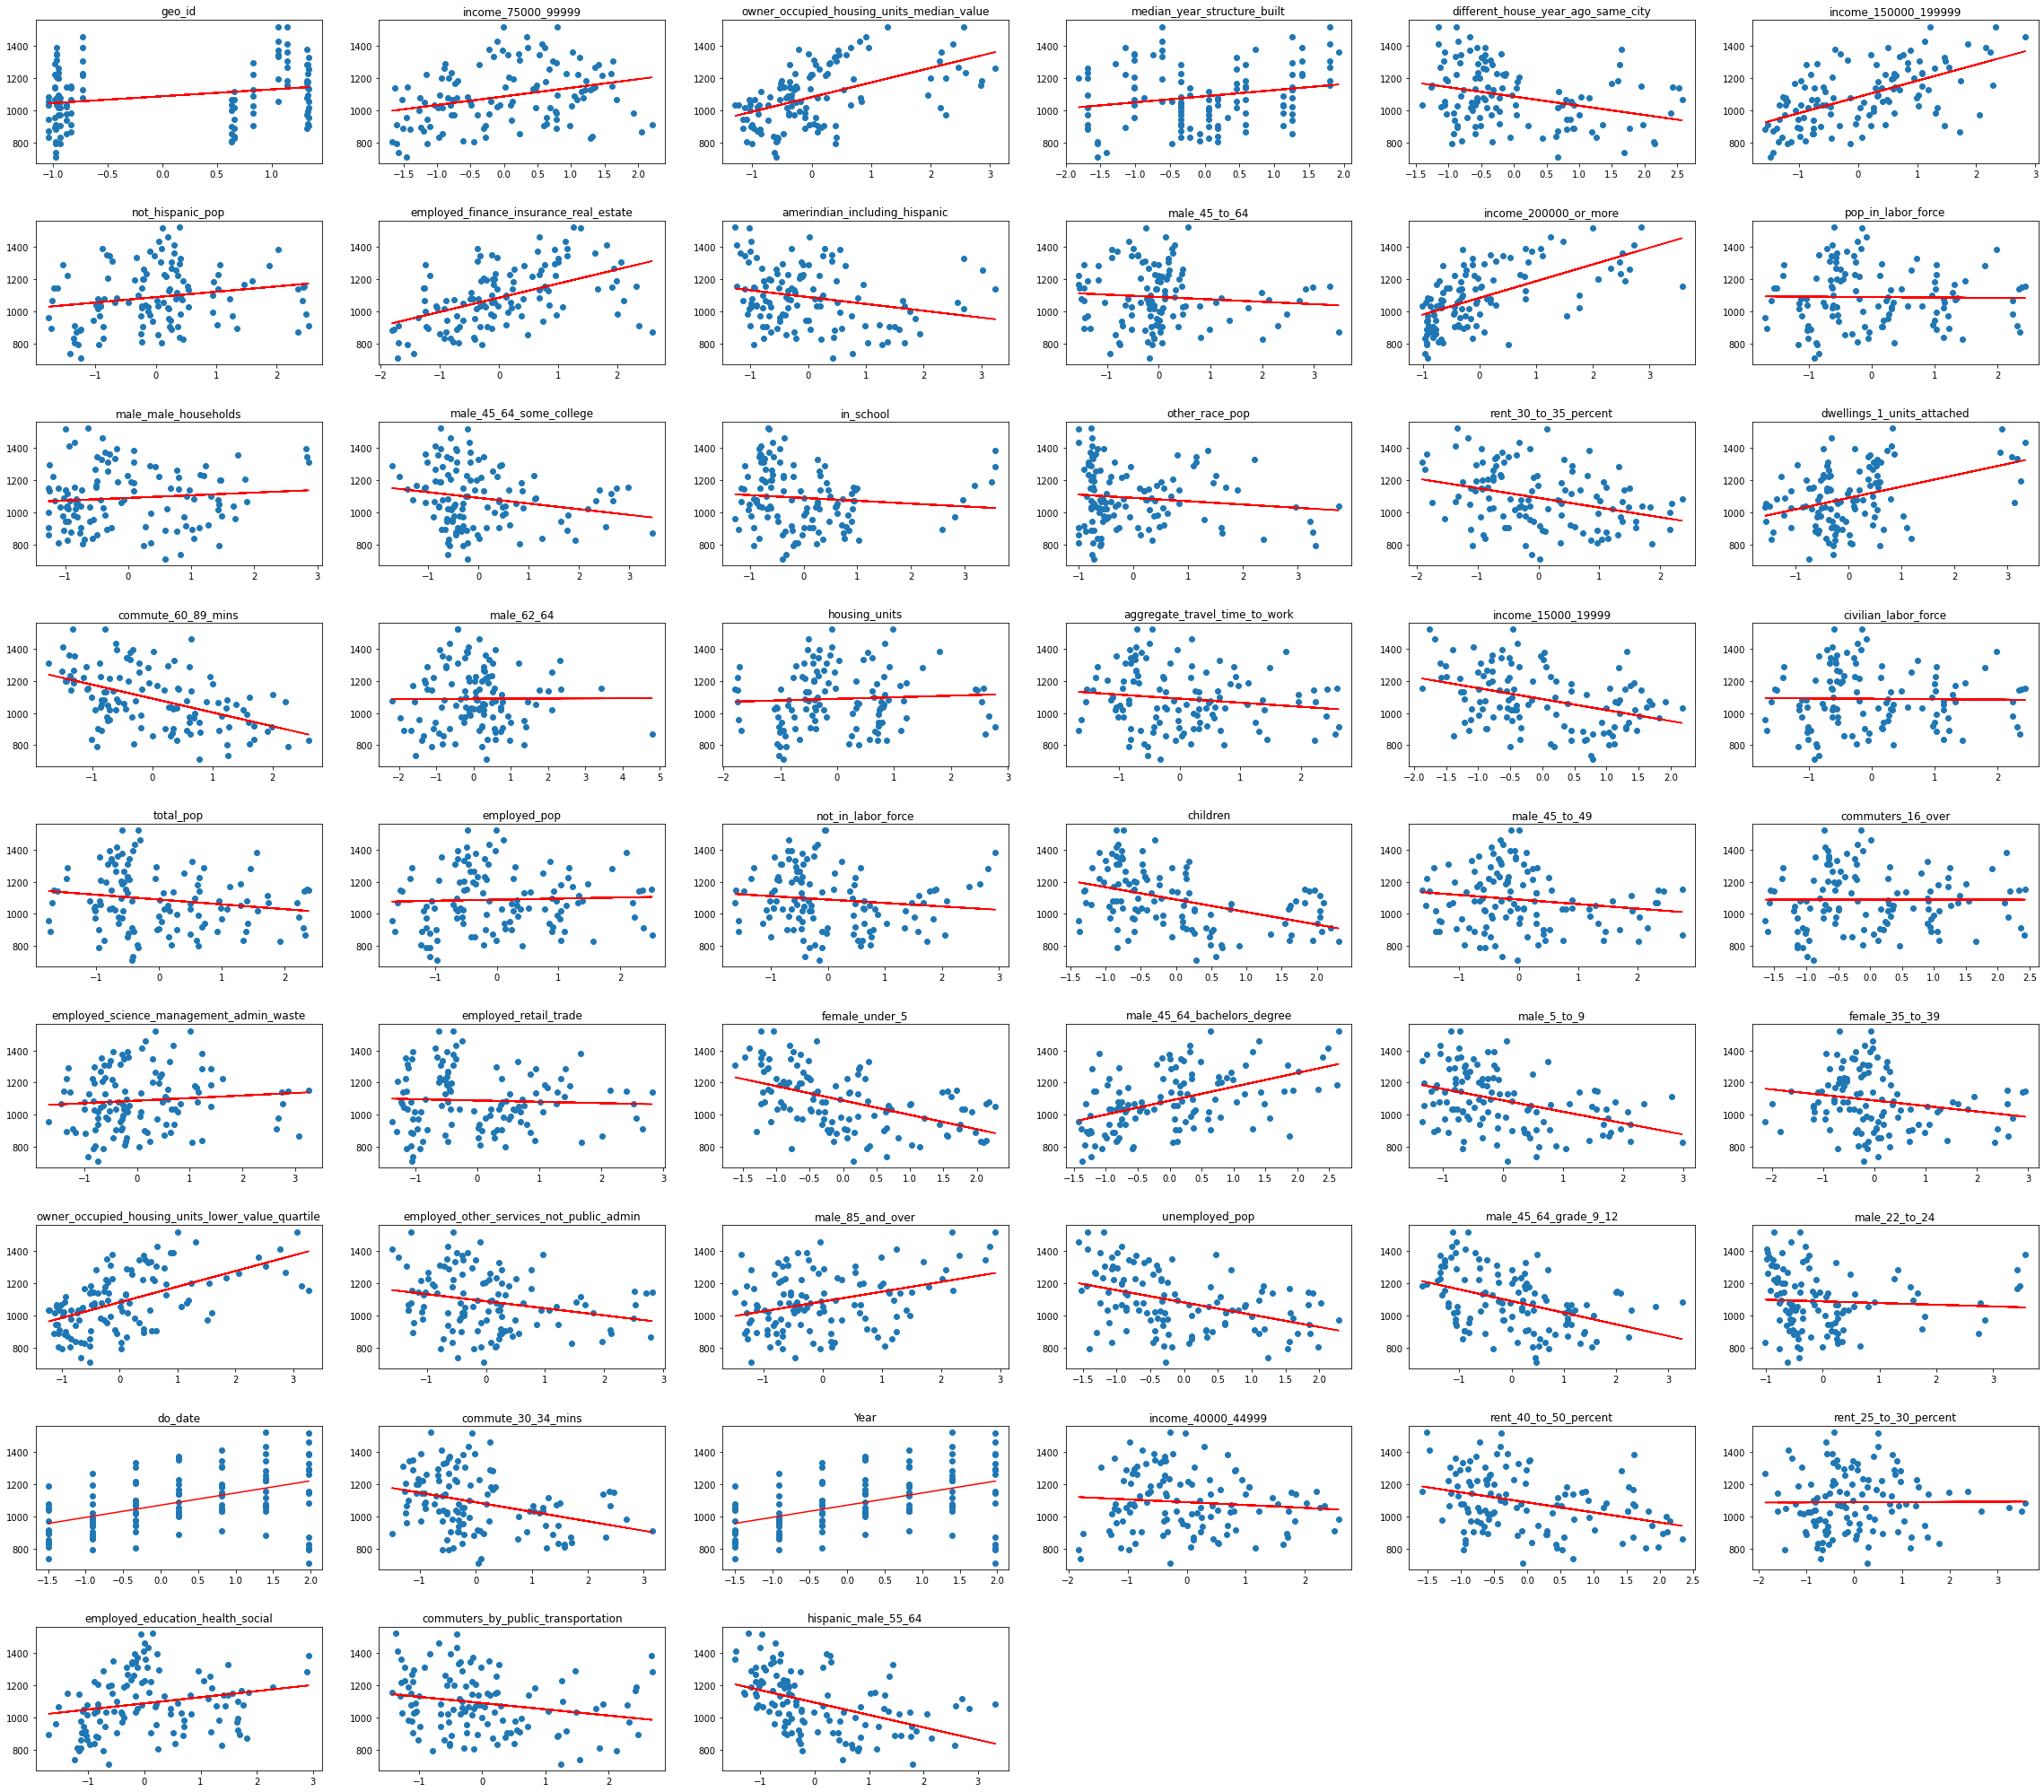

In [49]:
third50_features=list(set(all_acs_features[100:149]+["Year","geo_id"]))
plot_XY_scatter(third50_features)

Missing values: 0


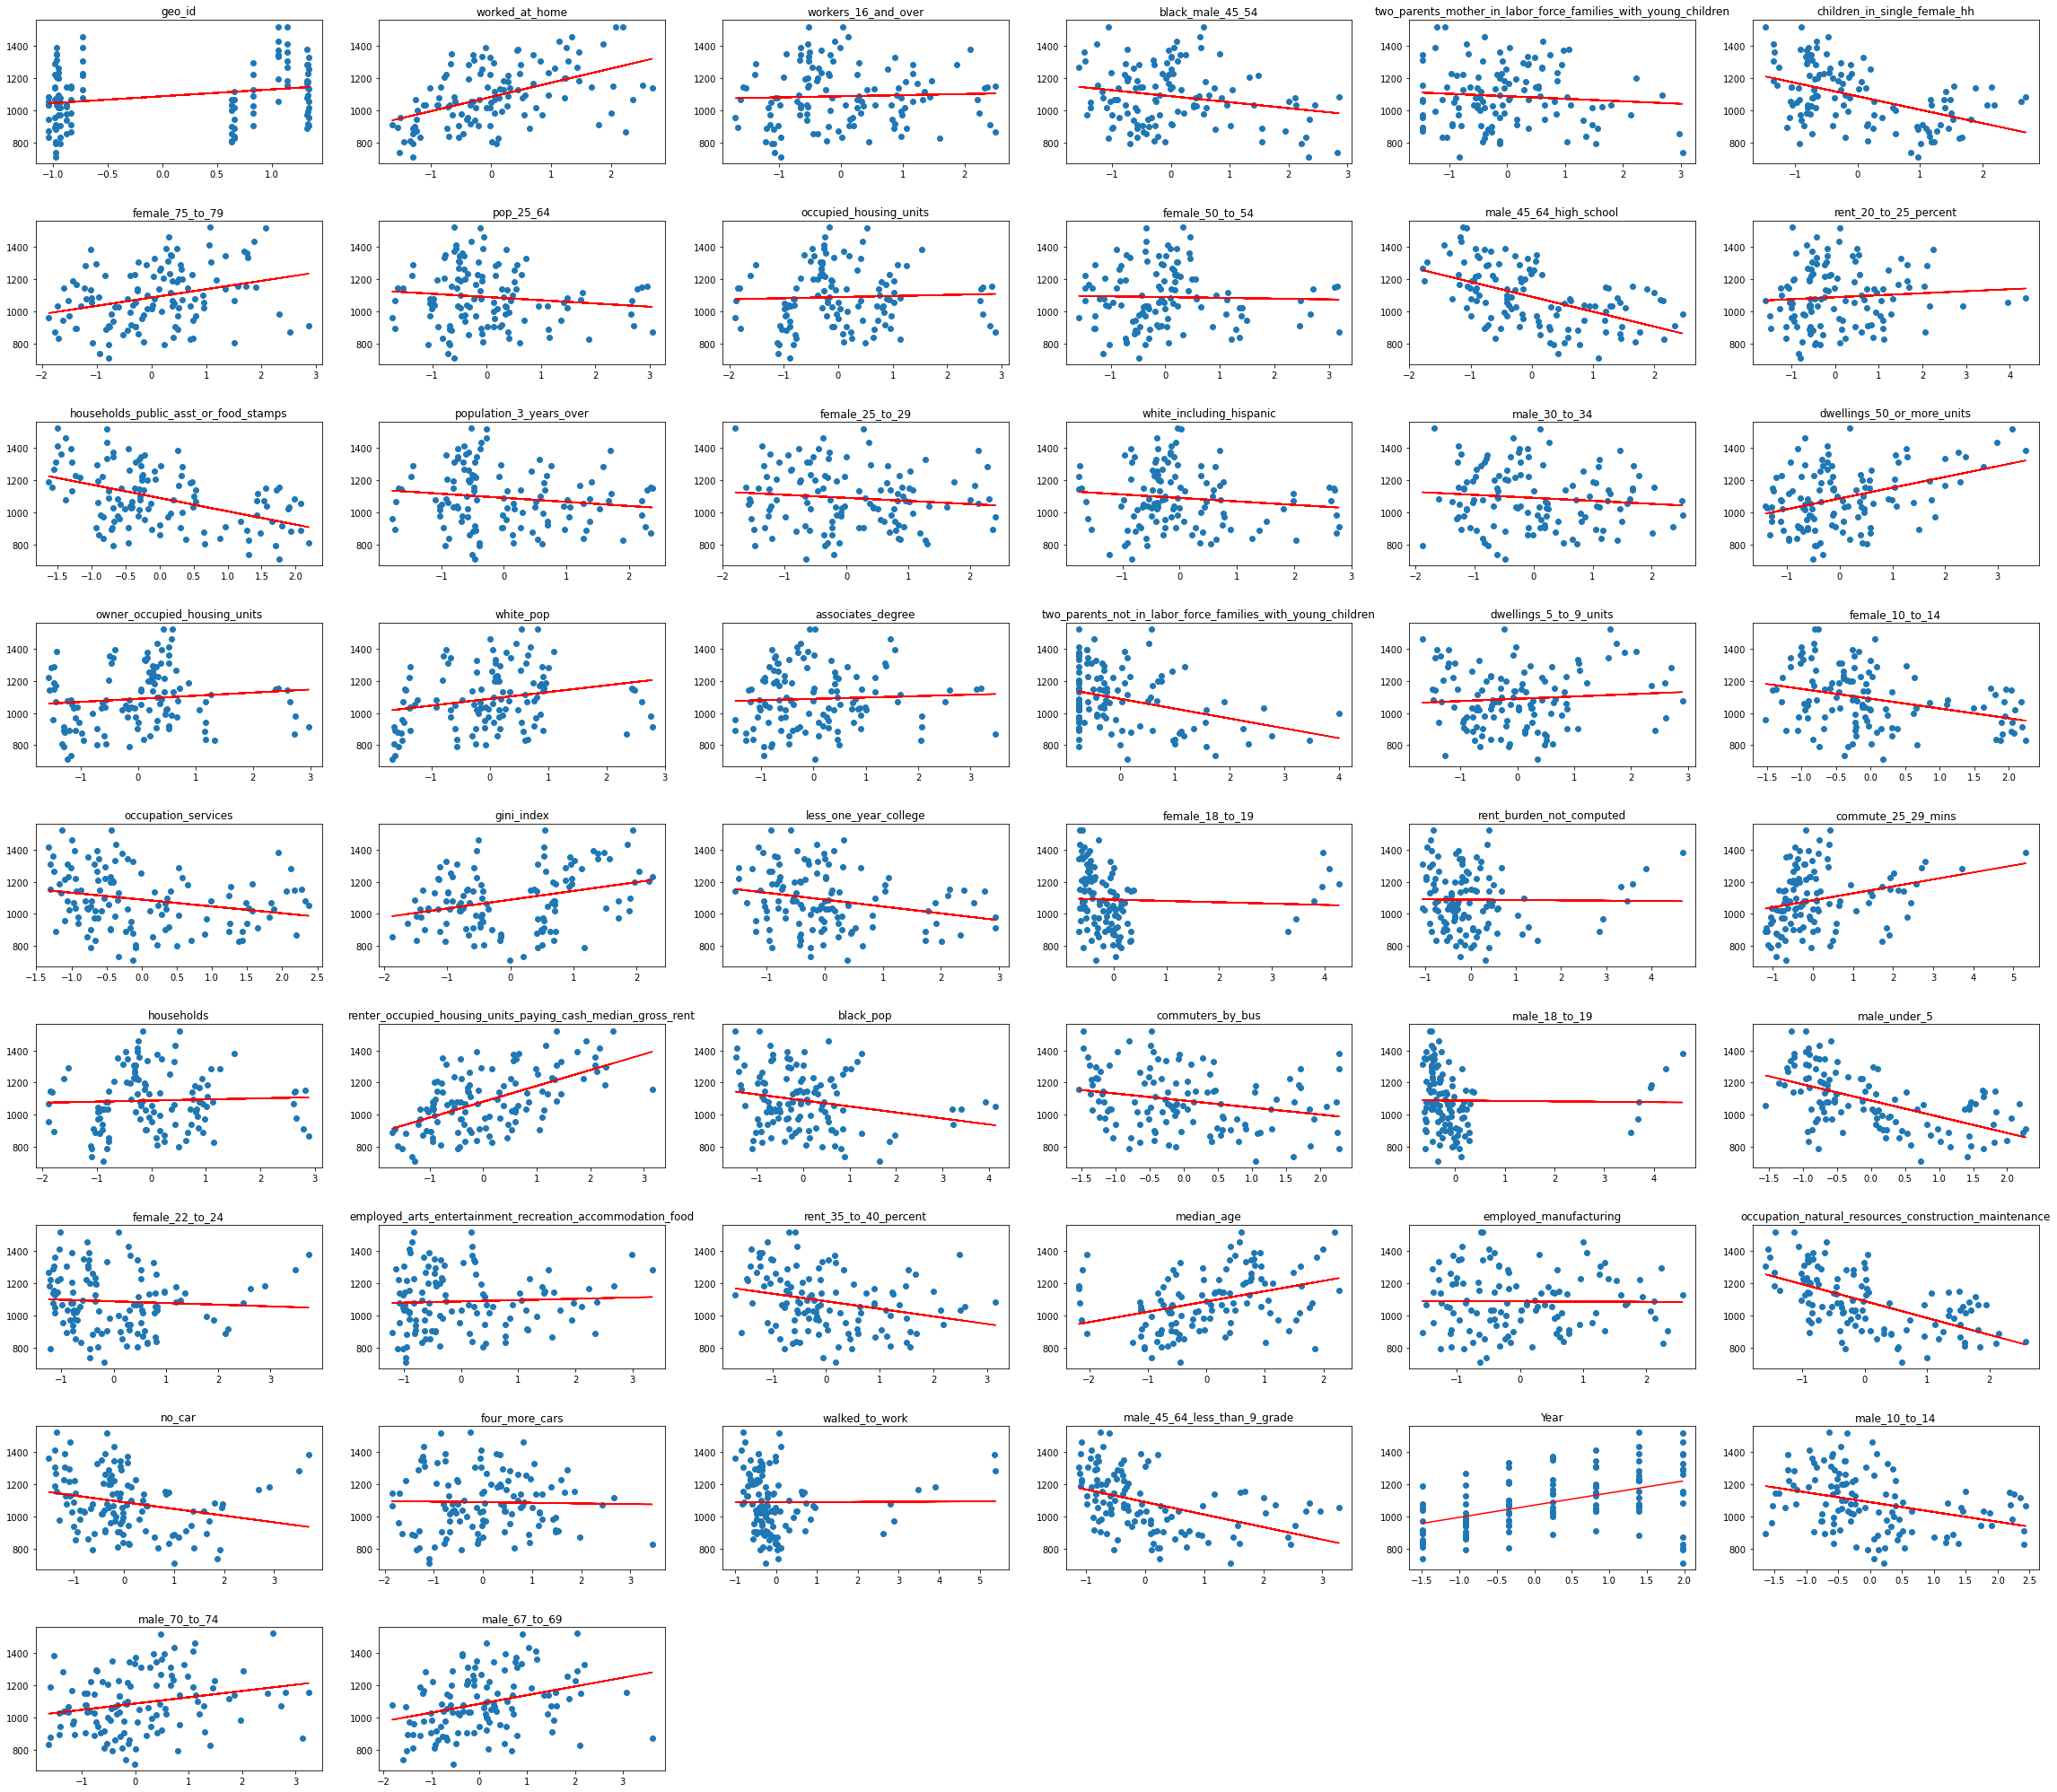

In [50]:
fourth50_features=list(set(all_acs_features[150:199]+["Year","geo_id"]))
plot_XY_scatter(fourth50_features)

Missing values: 0


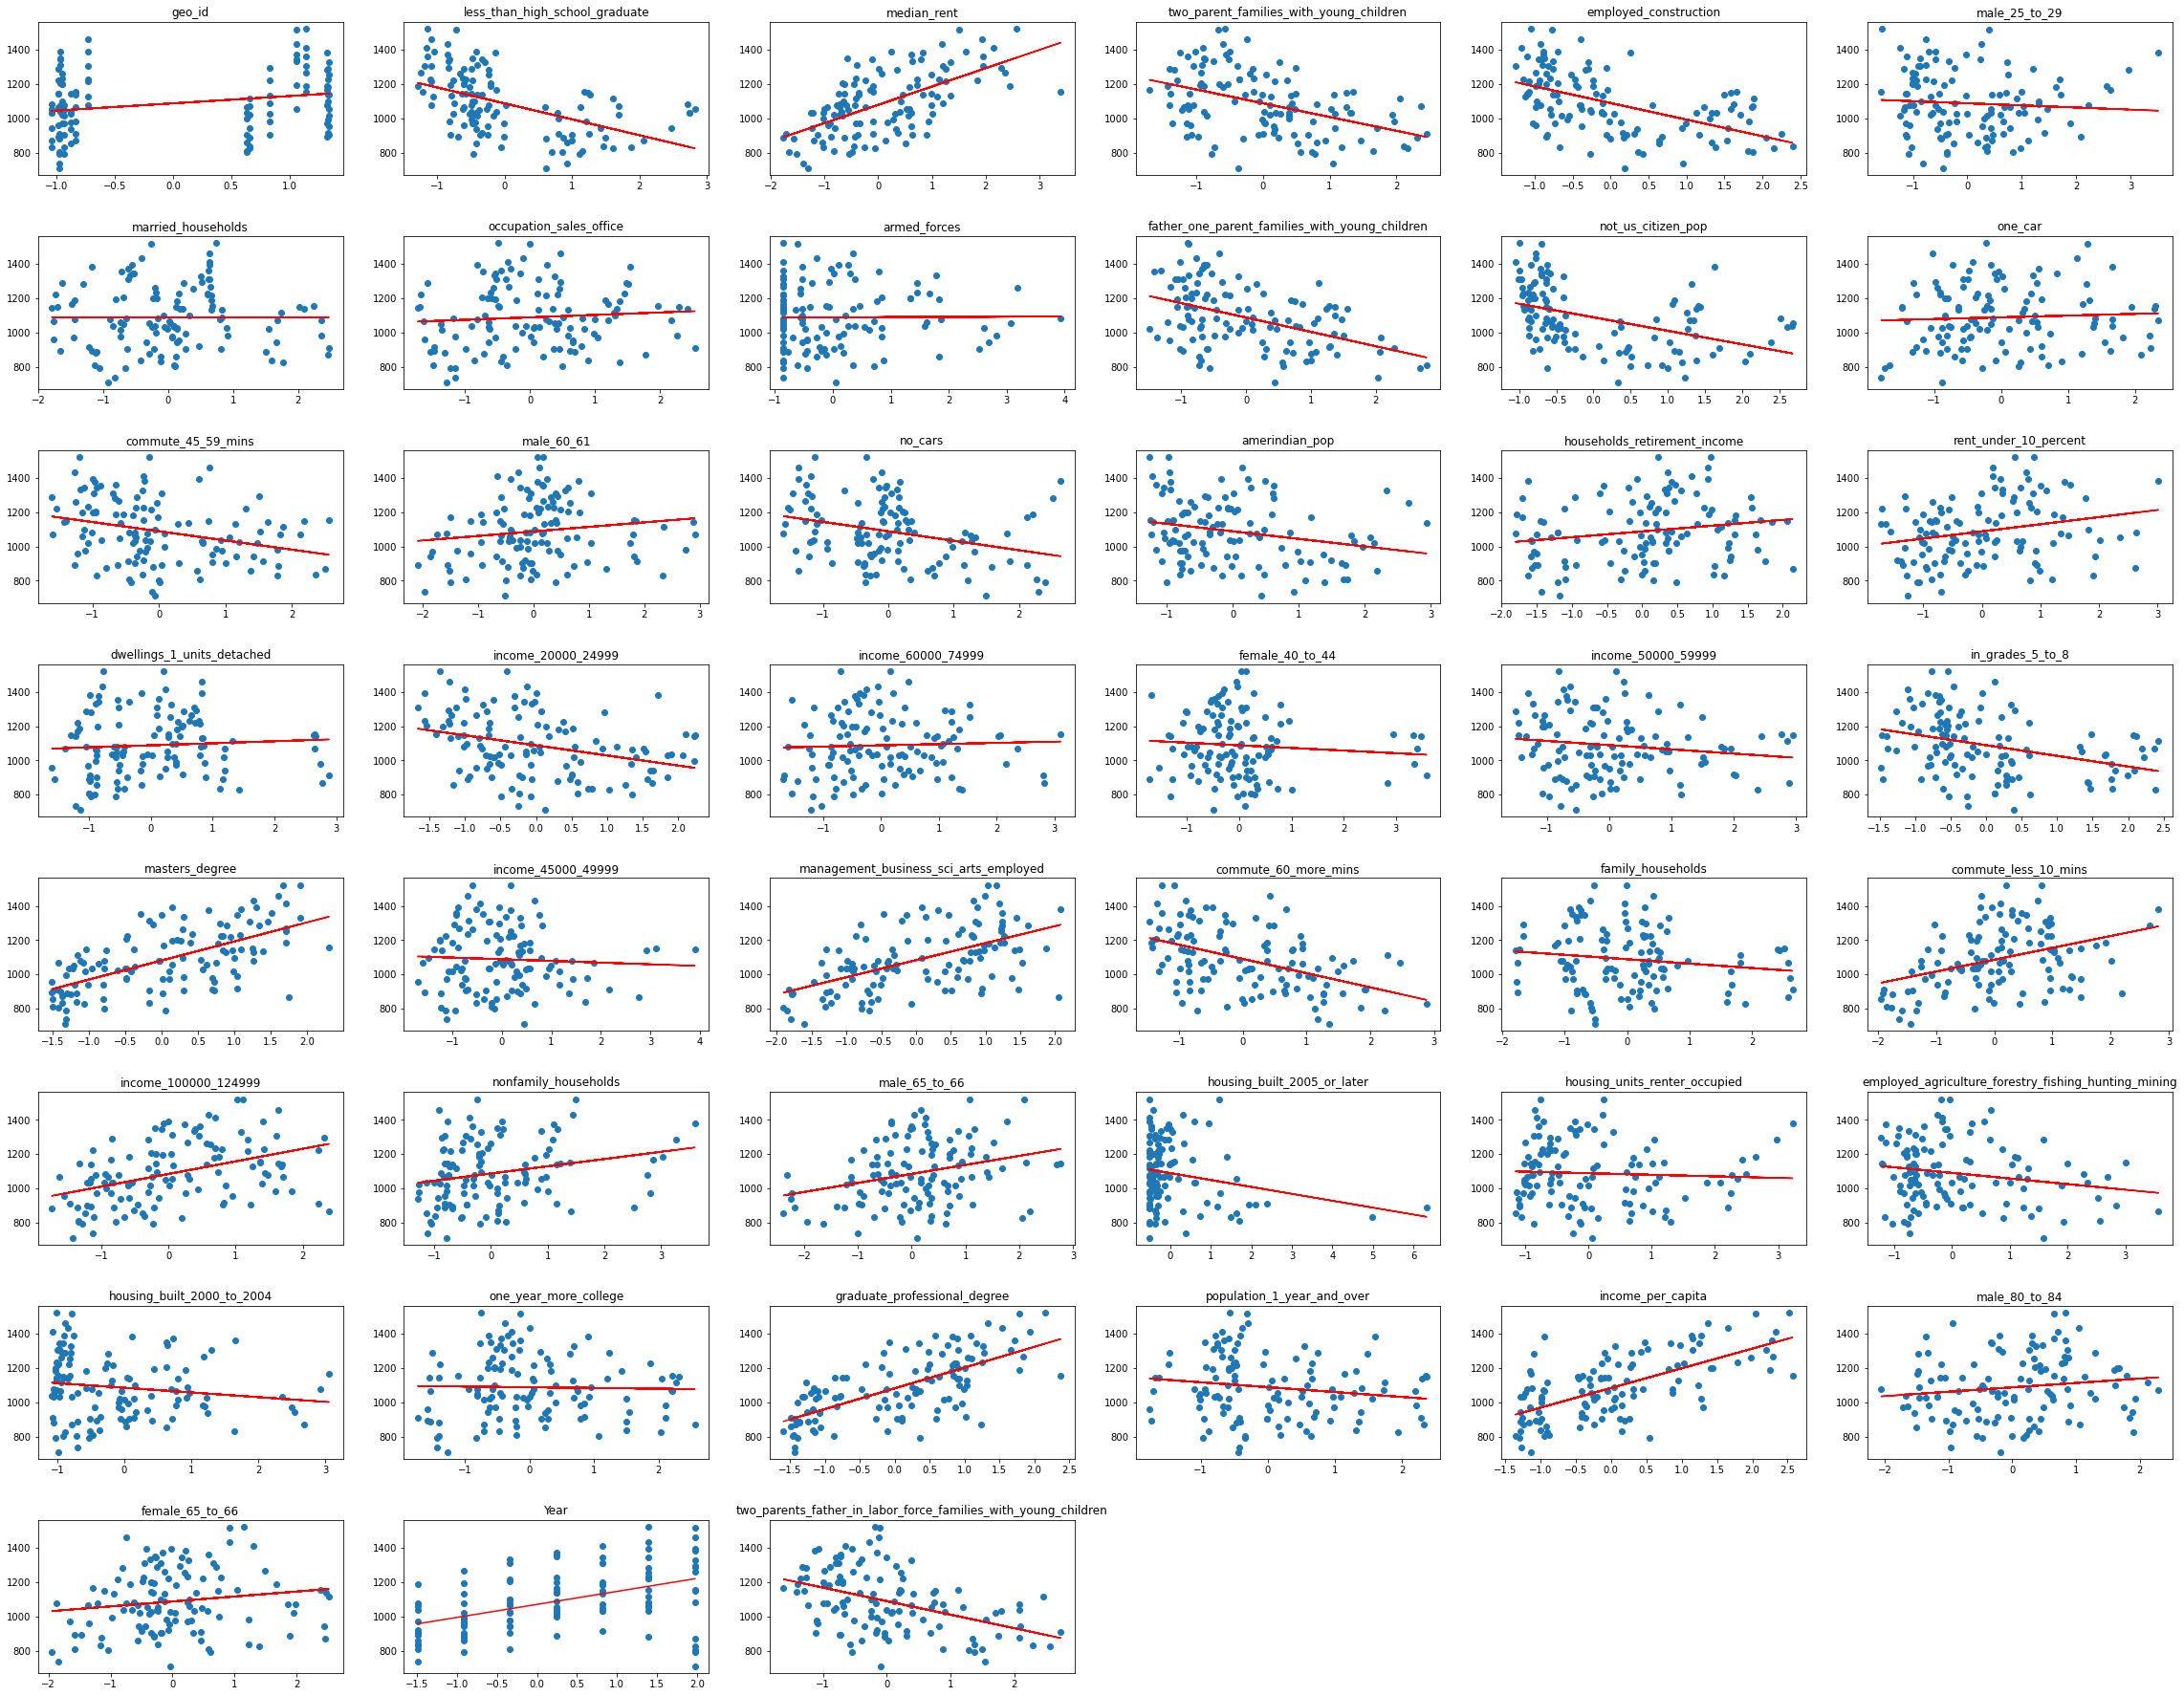

In [51]:
fifth50_features=list(set(all_acs_features[200:249]+["Year","geo_id"]))
plot_XY_scatter(fifth50_features)

In [126]:
#first pass Linear Regression based on slope analysis only
features_selected=list(set(features_selected))
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.model_selection import train_test_split

lm = LinearRegression()

X1_train, X1_test, Y_train, Y_test = train_test_split(acs_new[features_selected].astype(float),y,test_size=0.2)
lm.fit(X1_train, Y_train)

print("Train Score: %.4f" % lm.score(X1_train, Y_train))
print("Test Score:  %.4f" % lm.score(X1_test, Y_test))

print(lm.score(X1_train, Y_train)- lm.score(X1_test, Y_test))

Train Score: 0.2444
Test Score:  0.2159
0.02849591582681199


In [151]:
features_selected

['hispanic_any_race',
 'income_30000_34999',
 'bachelors_degree_or_higher_25_64',
 'in_grades_9_to_12',
 'commute_90_more_mins',
 'bachelors_degree',
 'poverty',
 'occupation_management_arts',
 'female_70_to_74',
 'median_income',
 'owner_occupied_housing_units_upper_value_quartile',
 'in_grades_1_to_4',
 'income_25000_29999',
 'female_5_to_9',
 'vacant_housing_units_for_rent',
 'income_125000_149999',
 'male_75_to_79',
 'two_parents_in_labor_force_families_with_young_children',
 'employed_wholesale_trade',
 'mobile_homes',
 'vacant_housing_units_for_sale',
 'rent_15_to_20_percent',
 'employed_information',
 'one_parent_families_with_young_children',
 'male_45_64_graduate_degree',
 'rent_10_to_15_percent',
 'families_with_young_children',
 'female_85_and_over',
 'Year',
 'female_15_to_17',
 'white_male_55_64',
 'father_in_labor_force_one_parent_families_with_young_children',
 'high_school_diploma',
 'male_15_to_17',
 'commute_5_9_mins',
 'high_school_including_ged',
 'percent_income_sp